In [213]:
import pandas as pd
import numpy as np

import seaborn as sns #library that uses matplotlib to make styled plots
import hypertools as hyp #library for visualizing "high-dimensional" data
import plotly_express as px #library for drawing interactive figures
%matplotlib inline 

In [214]:
!ls ../../../../

add_remotes.sh	assignments	    data-stories  LICENSE    slides
admin		CODE_OF_CONDUCT.md  docker	  README.md


In [215]:
attendance_data = pd.read_csv('../../../../data-stories/school-attendance/attendance_data_17-18.csv')

In [216]:
attendance_data.head()

,id,grade,age,school code,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,excused2,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4
0,300053,11,16,1,F,N,NaN,NaN,12,0,0,0,0,0,0,0,0,0,0,0
1,300340,12,17,1,M,N,NaN,NaN,5,0,3,0,0,0,0,0,0,0,0,0
2,300344,10,15,1,M,N,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,300345,9,15,1,M,N,NaN,504,7,0,3,0,0,0,0,0,0,0,0,0
4,300628,12,17,1,F,N,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,0


In [217]:
attendance_data.set_index('id', inplace=True) #set the index to the values in the id field
attendance_data.drop(['homeless', 'disadvantaged', 'excused2', 'unexcused2', 'tardy2', 'excused3', 'unexcused3', 'tardy3', 'excused4', 'unexcused4', 'tardy4'], inplace=True, axis=1) #drop columns

In [218]:
attendance_data.head()

,grade,age,school code,sex,specialneeds,excused1,unexcused1,tardy1
id,,,,,,,,
300053,11,16,1,F,NaN,12,0,0
300340,12,17,1,M,NaN,5,0,3
300344,10,15,1,M,NaN,0,0,0
300345,9,15,1,M,504,7,0,3
300628,12,17,1,F,NaN,0,0,3


In [237]:
attendance_data["specialneeds"].fillna("n/a", inplace = True)

In [238]:
px.scatter(attendance_data, x='age', y='grade')

In [239]:
attendance_data.head()

,grade,age,school code,sex,specialneeds,excused1,unexcused1,tardy1
id,,,,,,,,
300053,11,16,1,F,n/a,12,0,0
300340,12,17,1,M,n/a,5,0,3
300344,10,15,1,M,n/a,0,0,0
300345,9,15,1,M,504,7,0,3
300628,12,17,1,F,n/a,0,0,3


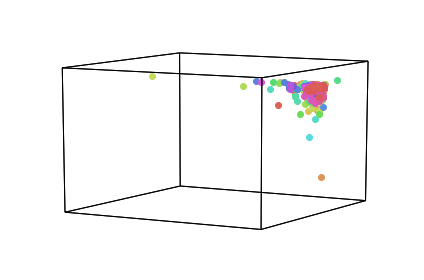

In [240]:
hyp.plot(attendance_data, 'o', hue=np.array(attendance_data.index), reduce='FastICA'); #each dot is a person


In [241]:
attendance_data.values

array([['11', 16, 1, ..., 12, 0, 0],
       ['12', 17, 1, ..., 5, 0, 3],
       ['10', 15, 1, ..., 0, 0, 0],
       ...,
       ['12', 17, 1, ..., 7, 5, 2],
       ['AW', 18, 1, ..., 0, 0, 0],
       ['11', 17, 1, ..., 0, 0, 0]], dtype=object)

In [242]:
attendance_data.head()

,grade,age,school code,sex,specialneeds,excused1,unexcused1,tardy1
id,,,,,,,,
300053,11,16,1,F,n/a,12,0,0
300340,12,17,1,M,n/a,5,0,3
300344,10,15,1,M,n/a,0,0,0
300345,9,15,1,M,504,7,0,3
300628,12,17,1,F,n/a,0,0,3


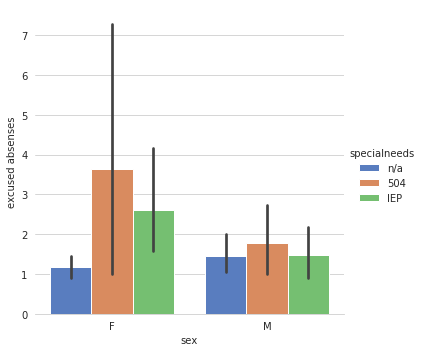

In [243]:
#source of barplot setup: https://seaborn.pydata.org/examples/grouped_barplot.html
g = sns.catplot(x="sex", y="excused1", hue="specialneeds", data=attendance_data,
                height=5, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("excused absenses")

## What I did and what I "found"   

I imported several tools to handle the data, and then I cleaned up the data by dropping some unnecessary columns, and converting nan values to "n/a". 

I then created a plot using hypertools but did not notice a clear pattern. 
When I created a barplot, I found that those who have the special needs code "504" had the greatest amount of excused absences for both females and males. Furtermore, females had a higher number of special needs excused absences than male. 
